In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
dim = 10
n_obs = 500
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
X = np.zeros((len(alphas), n_obs, dim))
for alpha_index, alpha in enumerate(alphas):
    X[alpha_index, :, :] = np.random.dirichlet(alpha * np.ones((dim,)), n_obs)
X.shape

(5, 500, 10)

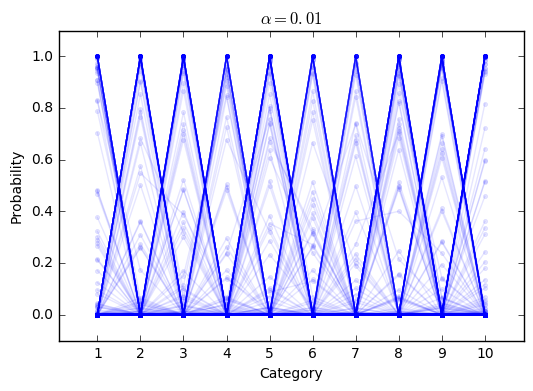

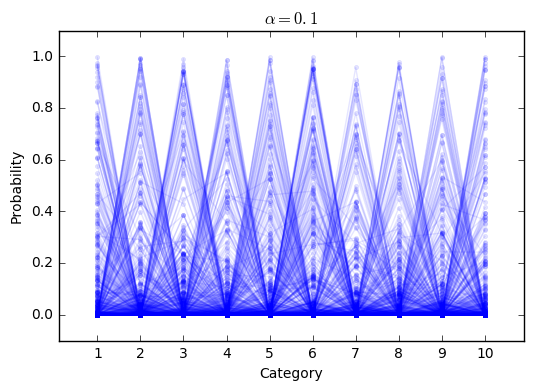

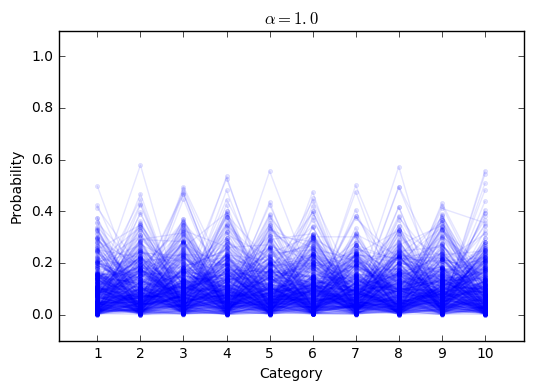

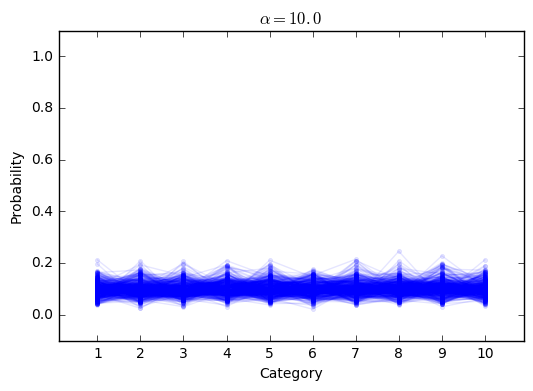

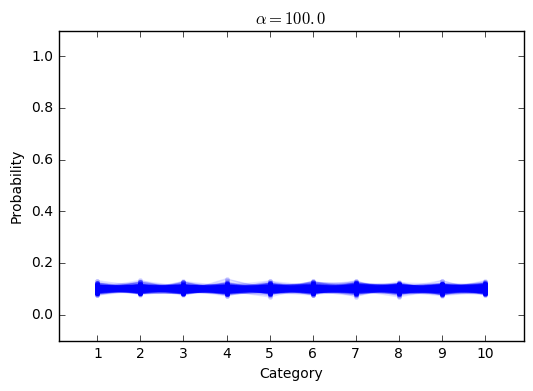

In [4]:
plot_categories = 1 + np.arange(dim)
for i in range(X.shape[0]):
    fig, ax = plt.subplots()
    for j in range(X.shape[1]):
        ax.plot(plot_categories, X[i, j], alpha = 0.1, color='blue', marker='.')#, linestyle='none')
    ax.margins(0.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlabel('Category')
    ax.set_xticks(plot_categories)
    ax.set_ylabel('Probability')
    ax.set_title(r"$\alpha = {}$".format(alphas[i]))
None

For each trial, compute the number of categories $k$ for which $P(K = k) > 1/(2 \cdot \mathrm{dim})$.  That is, compute the number of categories which have at least $1/(2 \cdot \mathrm{dim})$ of the probability mass assigned to them.

In [5]:
threshold = 1 / float(dim) - 1 / float(dim**2)
freq = np.array([[np.count_nonzero(X[i, j, :] > threshold) for j in range(X.shape[1])] for i in range(X.shape[0])])
freq.shape

(5, 500)

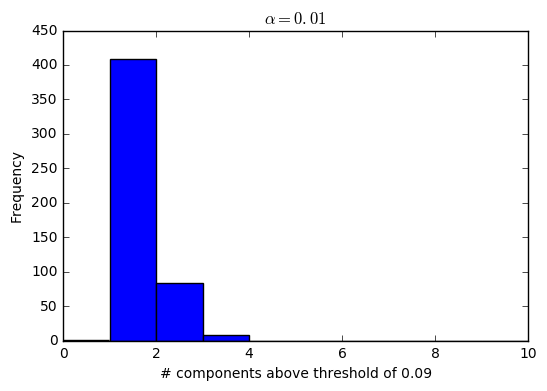

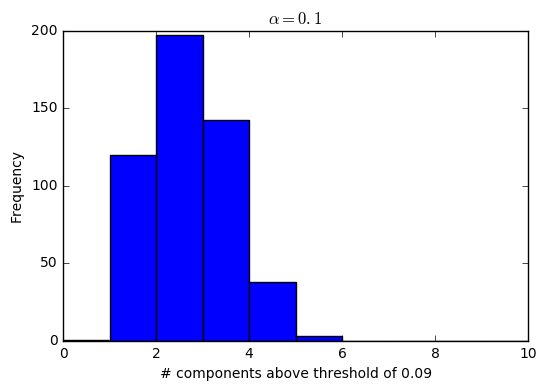

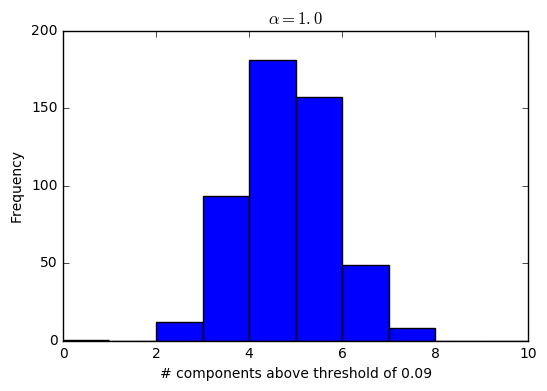

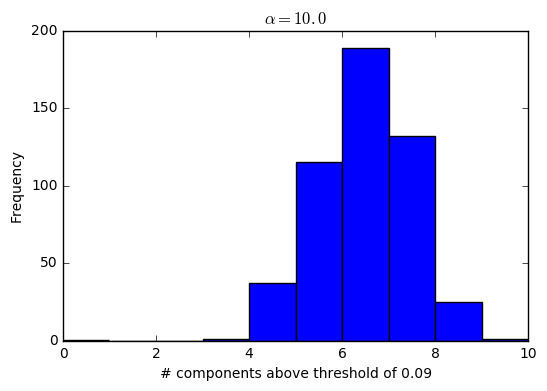

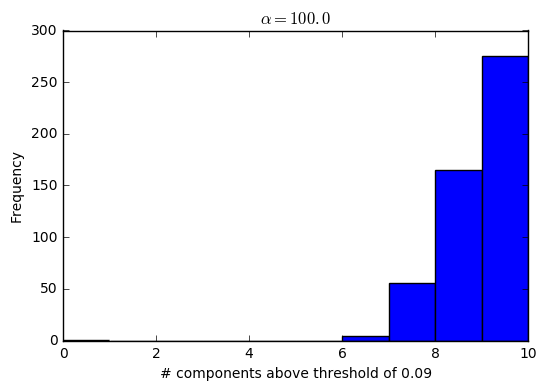

In [6]:
for i in range(freq.shape[0]):
    fig, ax = plt.subplots()
    ax.hist(freq[i,:], bins=np.arange(dim+1))
    ax.set_ylabel("Frequency")
    ax.set_xlabel("# components above threshold of {}".format(threshold))
    ax.set_title(r"$\alpha = {}$".format(alphas[i]))
None